1. 라이브러리 및 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import lightgbm as lgb

In [2]:
# load data
train = pd.read_csv('C:/Users/zz325/PycharmProjects/2020742043/Datamining/1.Training/원천데이터/2.수면/train_sleep.csv')
train_label = pd.read_csv('C:/Users/zz325/PycharmProjects/2020742043/Datamining/1.Training/라벨링데이터/2.수면/training_label.csv')
test = pd.read_csv('C:/Users/zz325/PycharmProjects/2020742043/Datamining/2.Validation/원천데이터/2.수면/val_sleep.csv')
test_label = pd.read_csv('C:/Users/zz325/PycharmProjects/2020742043/Datamining/2.Validation/라벨링데이터/2.수면/val_label.csv')


2. 탐색적 자료분석

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9705 non-null   object 
 1   sleep_awake                               9705 non-null   int64  
 2   sleep_bedtime_end                         9705 non-null   object 
 3   sleep_bedtime_start                       9705 non-null   object 
 4   sleep_breath_average                      9705 non-null   float64
 5   sleep_deep                                9705 non-null   int64  
 6   sleep_duration                            9705 non-null   int64  
 7   sleep_efficiency                          9705 non-null   int64  
 8   sleep_hr_5min                             9705 non-null   object 
 9   sleep_hr_average                          9705 non-null   float64
 10  sleep_hr_lowest                     

In [4]:
# CN(정상): 1, Dem(인지기능장애): 2, MCI(치매): 3
train_label

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+014@rowan.kr,MCI
2,nia+220@rowan.kr,CN
3,nia+096@rowan.kr,MCI
4,nia+396@rowan.kr,CN
...,...,...
136,nia+181@rowan.kr,CN
137,nia+354@rowan.kr,CN
138,nia+448@rowan.kr,MCI
139,nia+394@rowan.kr,CN


In [5]:
test

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+404@rowan.kr,13950,2020-11-27T06:54:33+09:00,2020-11-26T21:03:33+09:00,16.500,2100,35460,61,...,70.53,...,27,97,66,62,-0.12,-0.12,21510,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...
1,nia+404@rowan.kr,7680,2020-11-28T06:35:25+09:00,2020-11-27T23:43:25+09:00,17.375,2430,24720,69,...,68.01,...,46,91,35,44,-0.32,-0.32,17040,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...
2,nia+404@rowan.kr,11880,2020-11-29T05:53:39+09:00,2020-11-28T20:39:39+09:00,17.000,2820,33240,64,...,64.89,...,34,89,41,62,0.07,0.07,21360,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...
3,nia+404@rowan.kr,9600,2020-11-30T05:53:11+09:00,2020-11-29T21:38:11+09:00,17.250,1770,29700,68,...,63.70,...,44,86,29,56,-0.41,-0.41,20100,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...
4,nia+404@rowan.kr,10710,2020-12-01T05:37:37+09:00,2020-11-30T20:53:37+09:00,17.250,3150,31440,66,...,67.07,...,39,14,54,59,-0.27,-0.27,20730,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,nia+280@rowan.kr,1680,2021-02-12T04:04:11+09:00,2021-02-12T00:11:11+09:00,18.500,6030,13980,88,...,63.33,...,90,89,22,25,-0.27,-0.27,12300,66/66/65/64/65/65/65/63/63/63/62/65/64/60/60/6...,4/2/4/4/2/2/2/2/3/2/1/1/2/2/1/1/1/1/1/1/3/2/2/...,45/35/29/27/34/30/31/32/41/40/37/28/43/46/53/4...
2474,nia+280@rowan.kr,12840,2021-02-13T09:20:01+09:00,2021-02-12T21:46:01+09:00,18.000,4020,41640,69,...,60.22,...,46,97,95,92,-0.13,-0.13,28800,66/0/0/69/69/69/67/65/63/63/64/64/66/70/66/65/...,4/2/4/2/1/4/2/2/2/1/1/1/1/4/2/2/2/2/3/3/3/3/3/...,21/0/0/30/31/35/35/29/37/34/35/35/31/15/20/23/...
2475,nia+280@rowan.kr,11250,2021-02-15T08:18:10+09:00,2021-02-14T21:40:10+09:00,18.375,6060,38280,71,...,65.38,...,51,81,62,85,0.21,0.21,27030,63/63/63/62/63/62/62/62/63/69/71/68/70/0/0/72/...,4/2/2/2/2/2/1/1/1/1/2/2/4/4/4/1/2/3/3/3/2/2/2/...,29/28/28/32/27/35/34/36/31/27/14/29/16/0/0/19/...
2476,nia+280@rowan.kr,7410,2021-02-16T07:43:02+09:00,2021-02-15T19:41:02+09:00,18.000,7110,43320,83,...,62.43,...,79,75,98,100,0.69,0.69,35910,0/72/71/70/68/69/69/68/68/0/0/0/68/68/68/68/67...,4/2/2/4/4/2/1/1/4/4/4/4/1/1/1/1/2/2/2/4/2/1/1/...,0/19/14/14/22/20/22/22/22/0/0/0/31/30/34/30/26...


In [6]:
# CN(정상): 1, Dem(인지기능장애): 2, MCI(치매): 3
test_label.head()

,SAMPLE_EMAIL,DIAG_NM
0,nia+163@rowan.kr,CN
1,nia+280@rowan.kr,CN
2,nia+322@rowan.kr,CN
3,nia+173@rowan.kr,CN
4,nia+320@rowan.kr,CN


[ 변수 설명 ]

* Email: 이메일
* sleep_awake: 깬 시간
* sleep_bedtime_end: 잠 종료 시간
* sleep_bedtime_start: 잠 시작 시간
* sleep_breath_average: 분당 평균 호흡 수
* sleep_deep: 깊은 수면 시간
* sleep_duration: 잠 시간
* sleep_efficiency: 수면 효율
* sleep_hr_5min: 5분당 심박동 로그
* sleep_hr_average: 분당 평균 심박동 수
* sleep_hr_lowest: 분당 낮은 심박동 수
* sleep_hypnogram_5min: 수면 상태 로그
* sleep_is_longest: 본 수면 여부
* sleep_light: 가벼운 수면 시간
* sleep_midpoint_at_delta: 수면 중간점 시간 델타
* sleep_midpoint_time: 수면 중간점 시간
* sleep_onset_latency: 수면 잠복 시간
* sleep_period_id: 수면 식별 아이디
* sleep_rem: 렘 수면 시간
* sleep_restless: 뒤척임 비율
* sleep_rmssd: 평균 심박동변동
* sleep_rmssd_5min: 5분당 심박동변동 로그
* sleep_score: 수면 종합 점수
* sleep_score_alignment: 수면 시기 점수
* sleep_score_deep: 깊은 수면 점수
* sleep_score_disturbances: 수면 방해 점수
* sleep_score_efficiency: 수면 효율 점수
* sleep_score_latencty: 수면 잠복 점수
* sleep_score_rem: 렘수면 점수
* sleep_socre_total: 수면 시간 기여 점수
* sleep_temperature_delta: 피부 온도 델타
* sleep_temperature_deviation: 피부 온도 편차
* sleep_tempperature_trend_deviation: 피부 온도 경향 편차
* timezone: 시간 장소 정보
* sleep_total: 수면 시간

In [7]:
# train data 연구 참여자 수: 141 = 85(CN) + 47(MCI) + Dem(9)
# test data 연구 참여자 수: 33 = 26(CN) + MCI(4) + Dem(3)

print(train.shape)
print(train_label.shape)
print(test.shape)
print(test_label.shape)
print(train_label['DIAG_NM'].value_counts())
print(test_label['DIAG_NM'].value_counts())

(9705, 36)
(141, 2)
(2478, 36)
(33, 2)
DIAG_NM
CN     85
MCI    47
Dem     9
Name: count, dtype: int64
DIAG_NM
CN     26
MCI     4
Dem     3
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Targets_train data')

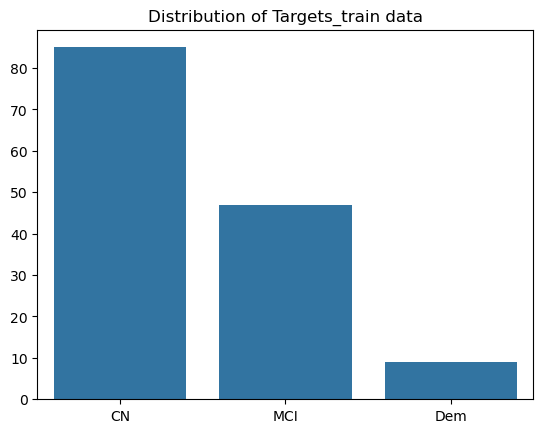

In [8]:
sns.countplot(data=train_label, x = 'DIAG_NM')
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Targets_train data')

Text(0.5, 1.0, 'Distribution of Targets_test data')

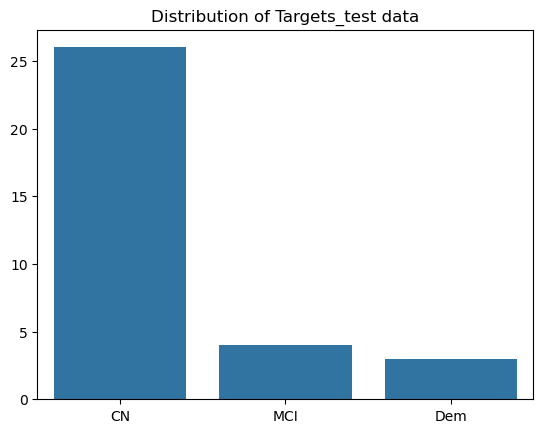

In [9]:
sns.countplot(data=test_label, x = 'DIAG_NM')
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Targets_test data')

In [10]:
# 문자열 데이터 체크
# count: 각 열의 데이터 개수
# unique: 고유값 개수
# top: 최빈값
# freq
train.describe(include=['O'])

,EMAIL,sleep_bedtime_end,sleep_bedtime_start,sleep_hr_5min,sleep_hypnogram_5min,sleep_rmssd_5min,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
count,9705,9705,9705,9705,9705,9705,9705,9705,9705
unique,141,9667,9681,1,1,1,9705,9705,9705
top,nia+068@rowan.kr,2020-11-24T08:42:59+09:00,2021-01-04T22:14:07+09:00,...,...,...,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...
freq,120,2,2,9705,9705,9705,1,1,1


Text(0.5, 1.0, 'Frequency per Email')

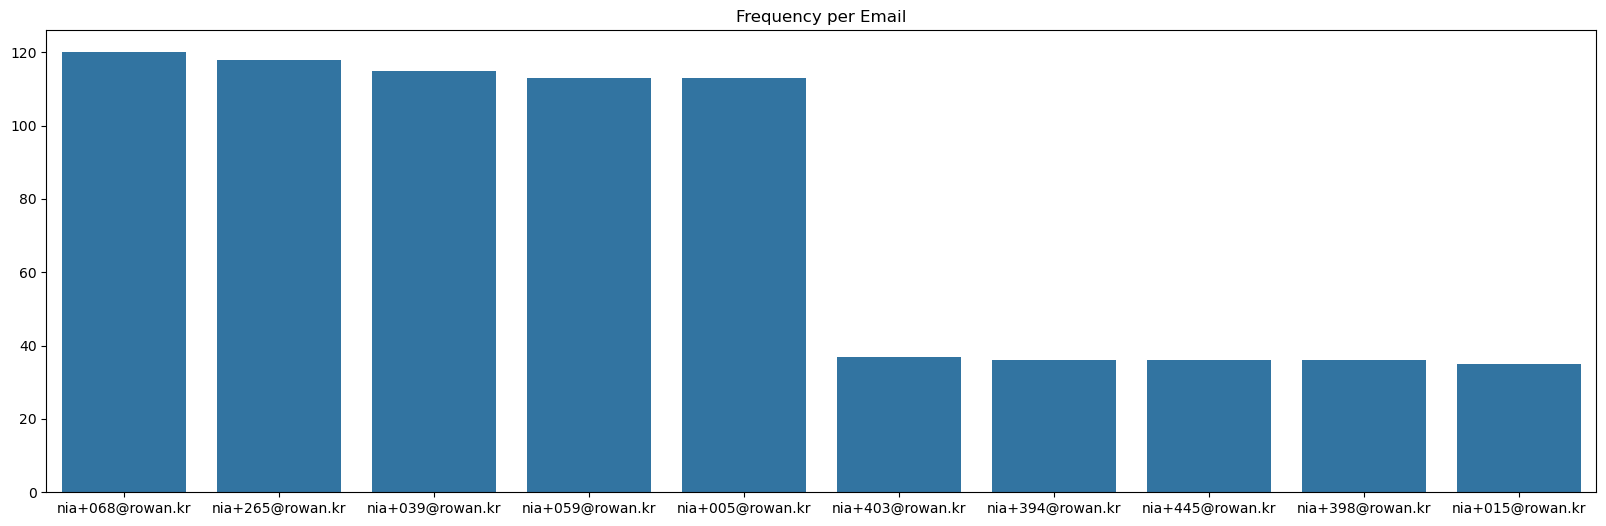

In [11]:
email_counts = train['EMAIL'].value_counts()
top = email_counts.head()
bottom = email_counts.tail()
selected = pd.concat([top,bottom])
selected_train = train[train['EMAIL'].isin(selected.index)]

plt.figure(figsize = (20,6))
sns.countplot(data=selected_train, x = 'EMAIL', order = selected.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency per Email')

In [27]:
def preprocessing(train, label):
    drop_cols = train.describe(include = 'O').columns[1:]
    train = train.drop(drop_cols, axis = 1)
    data = train.groupby('EMAIL').mean().reset_index()
    labeling = dict(np.array(label))

    data['target'] = data['EMAIL'].map(labeling)
    train['target'] = train['EMAIL'].map(labeling)
    
    return data, train

train_mean, train_all = preprocessing(train, train_label)
train_all

,EMAIL,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,target
0,nia+279@rowan.kr,8700,17.875,10110,37920,77,53.04,49,1,15330,...,100,78,65,89,56,94,0.00,0.00,29220,MCI
1,nia+279@rowan.kr,6570,18.000,7440,28680,77,52.82,49,1,11820,...,98,77,65,97,43,65,0.34,0.34,22110,MCI
2,nia+279@rowan.kr,10530,18.000,4620,32040,67,52.01,47,1,12360,...,94,60,41,75,68,62,-0.07,-0.07,21510,MCI
3,nia+279@rowan.kr,4080,17.500,7440,25440,84,51.07,46,1,9060,...,98,80,81,83,73,62,-0.14,-0.14,21360,MCI
4,nia+279@rowan.kr,7170,17.875,4320,20700,65,50.80,47,1,7470,...,88,72,39,78,25,29,-0.50,-0.50,13530,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,15.875,1710,33360,82,63.75,57,1,19320,...,34,57,76,81,95,86,-0.09,-0.09,27360,CN
9701,nia+206@rowan.kr,5700,16.125,0,27720,79,67.40,61,1,16140,...,1,56,69,86,89,64,0.41,0.41,22020,CN
9702,nia+206@rowan.kr,5070,15.625,480,35460,86,64.84,60,1,22170,...,9,59,86,89,98,97,0.27,0.27,30390,CN
9703,nia+206@rowan.kr,2040,15.875,2220,27840,93,67.05,60,1,17880,...,44,59,98,89,86,80,-0.05,-0.05,25800,CN


In [13]:
print(len(train_all.columns))

29


In [14]:
# target 포함
tmp = train_all

# target 변수 numerical data로 변환
target_dict = {"CN": 1, "MCI": 2, "Dem": 3}
tmp['target'] = tmp['target'].map(target_dict)
tmp = tmp.sort_values(by=['target','EMAIL'], ascending=[True,True])
tmp = tmp.reset_index(drop=True)

<Axes: >

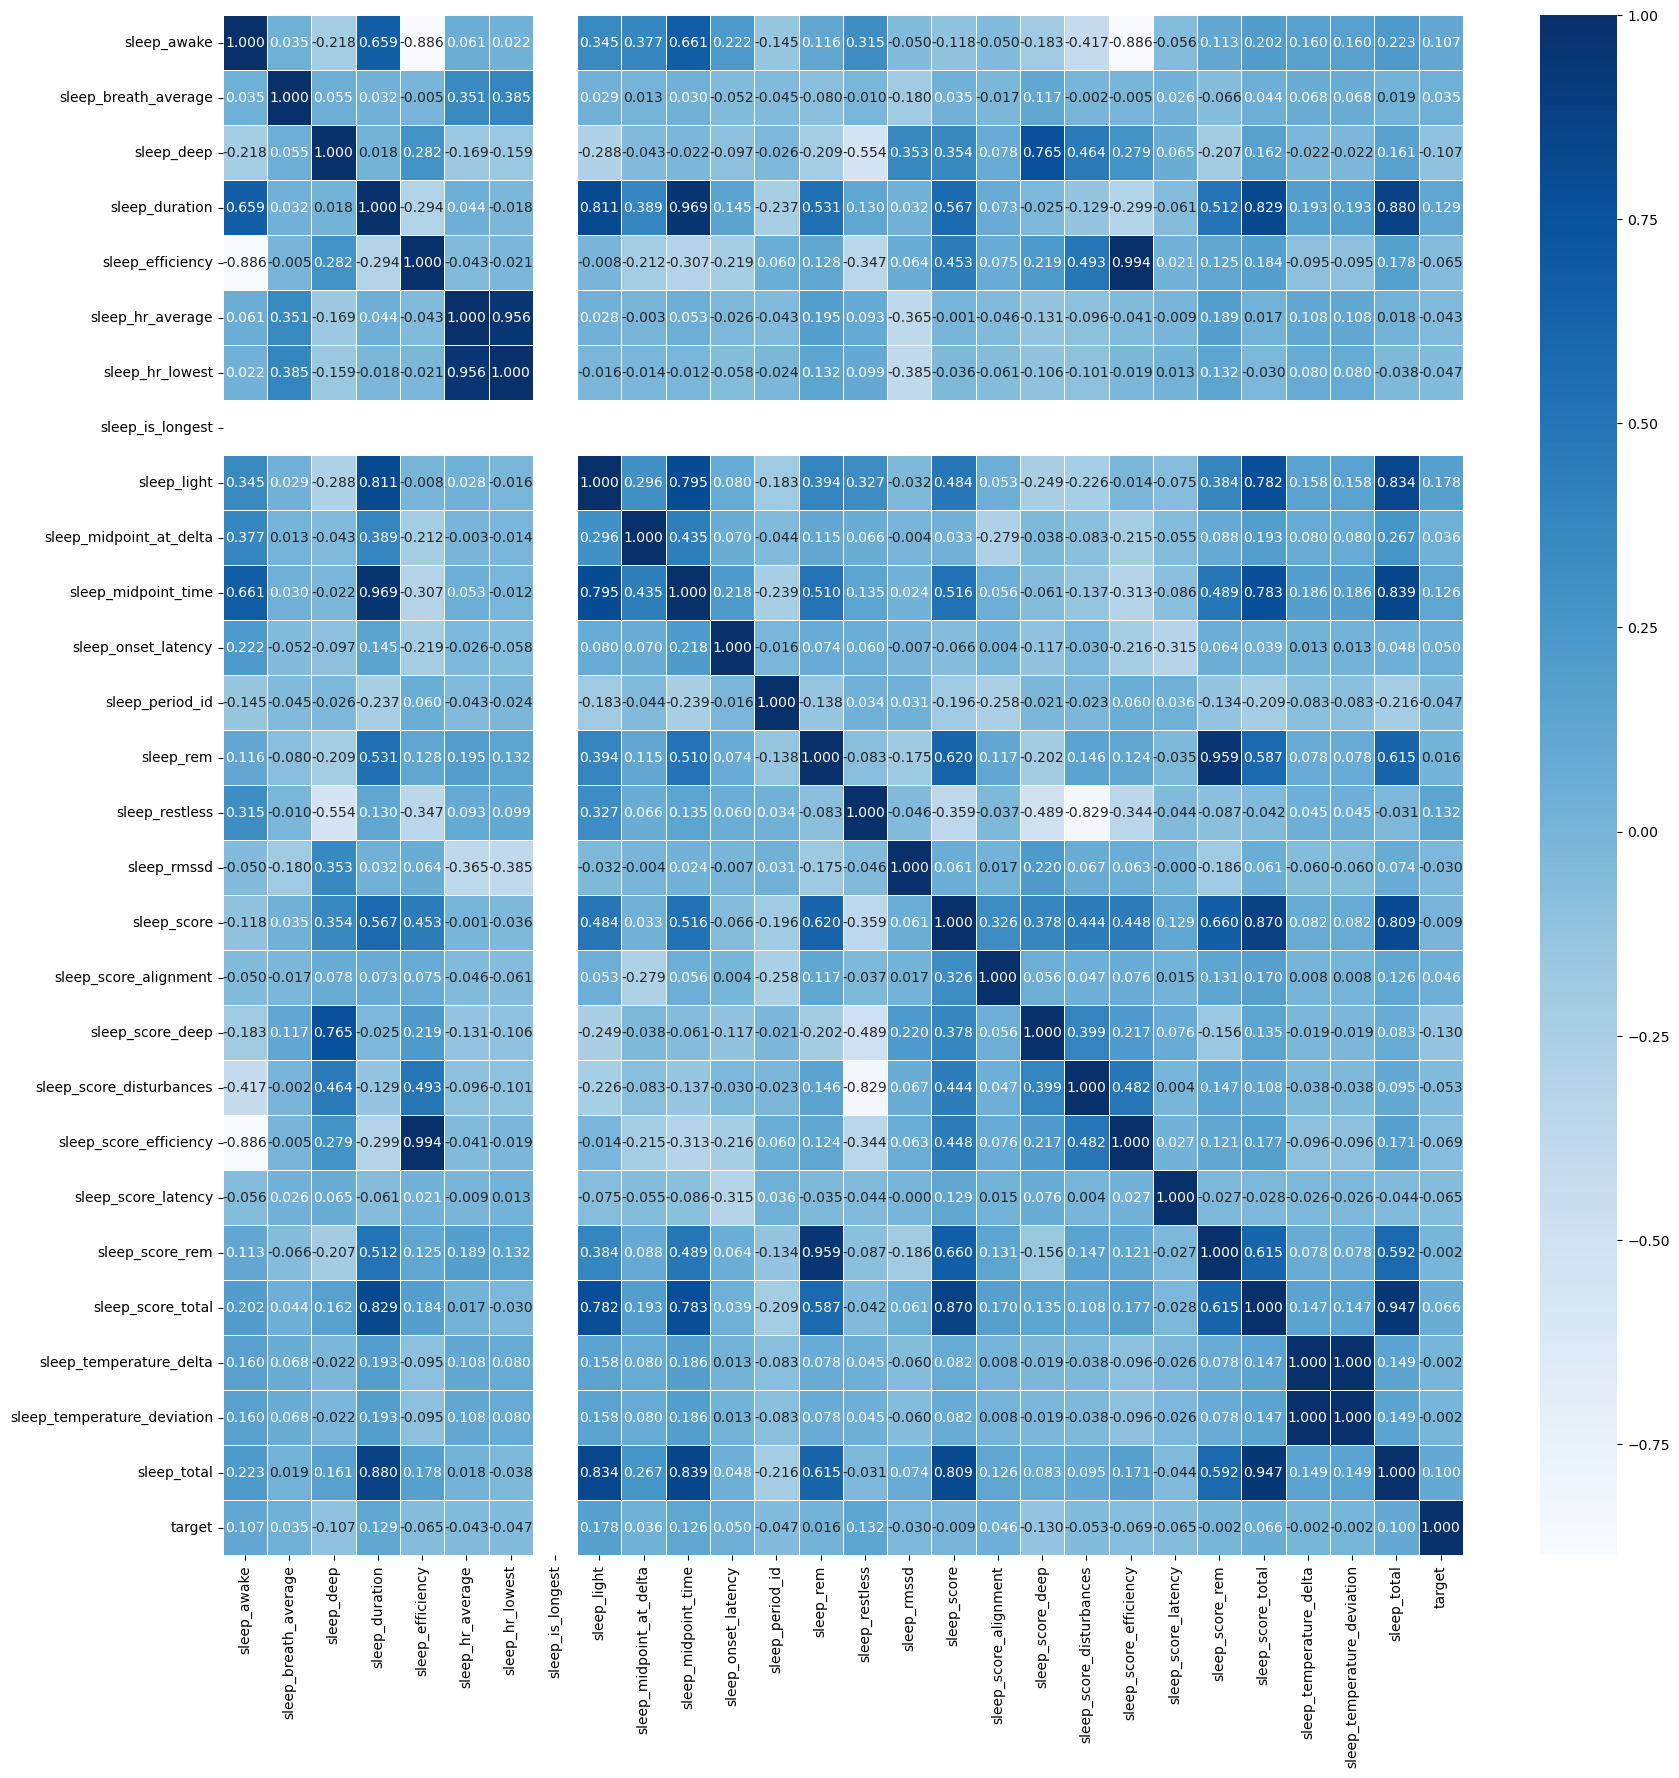

In [15]:
# 상관관계를 시각화

# heatmap을 그릴 영역을 5*5로 지정
plt.figure(figsize=(20, 20))

# heatmap에 대한 세부 사항 지정
# data= 데이터프레임(문자열을 제외한 데이터만 사용)
# annot= True: 박스 안 값 표시
# fmt='.2f': 박스 안에 표시될 값의 표시 형식, 소숫점 두자리수까지만 표시
# linewidths= 0.5: 박스와 박스 사이의 간격 설정
# cmap= 'Blues': 색상 선택
sns.heatmap(data=tmp.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')

<Axes: >

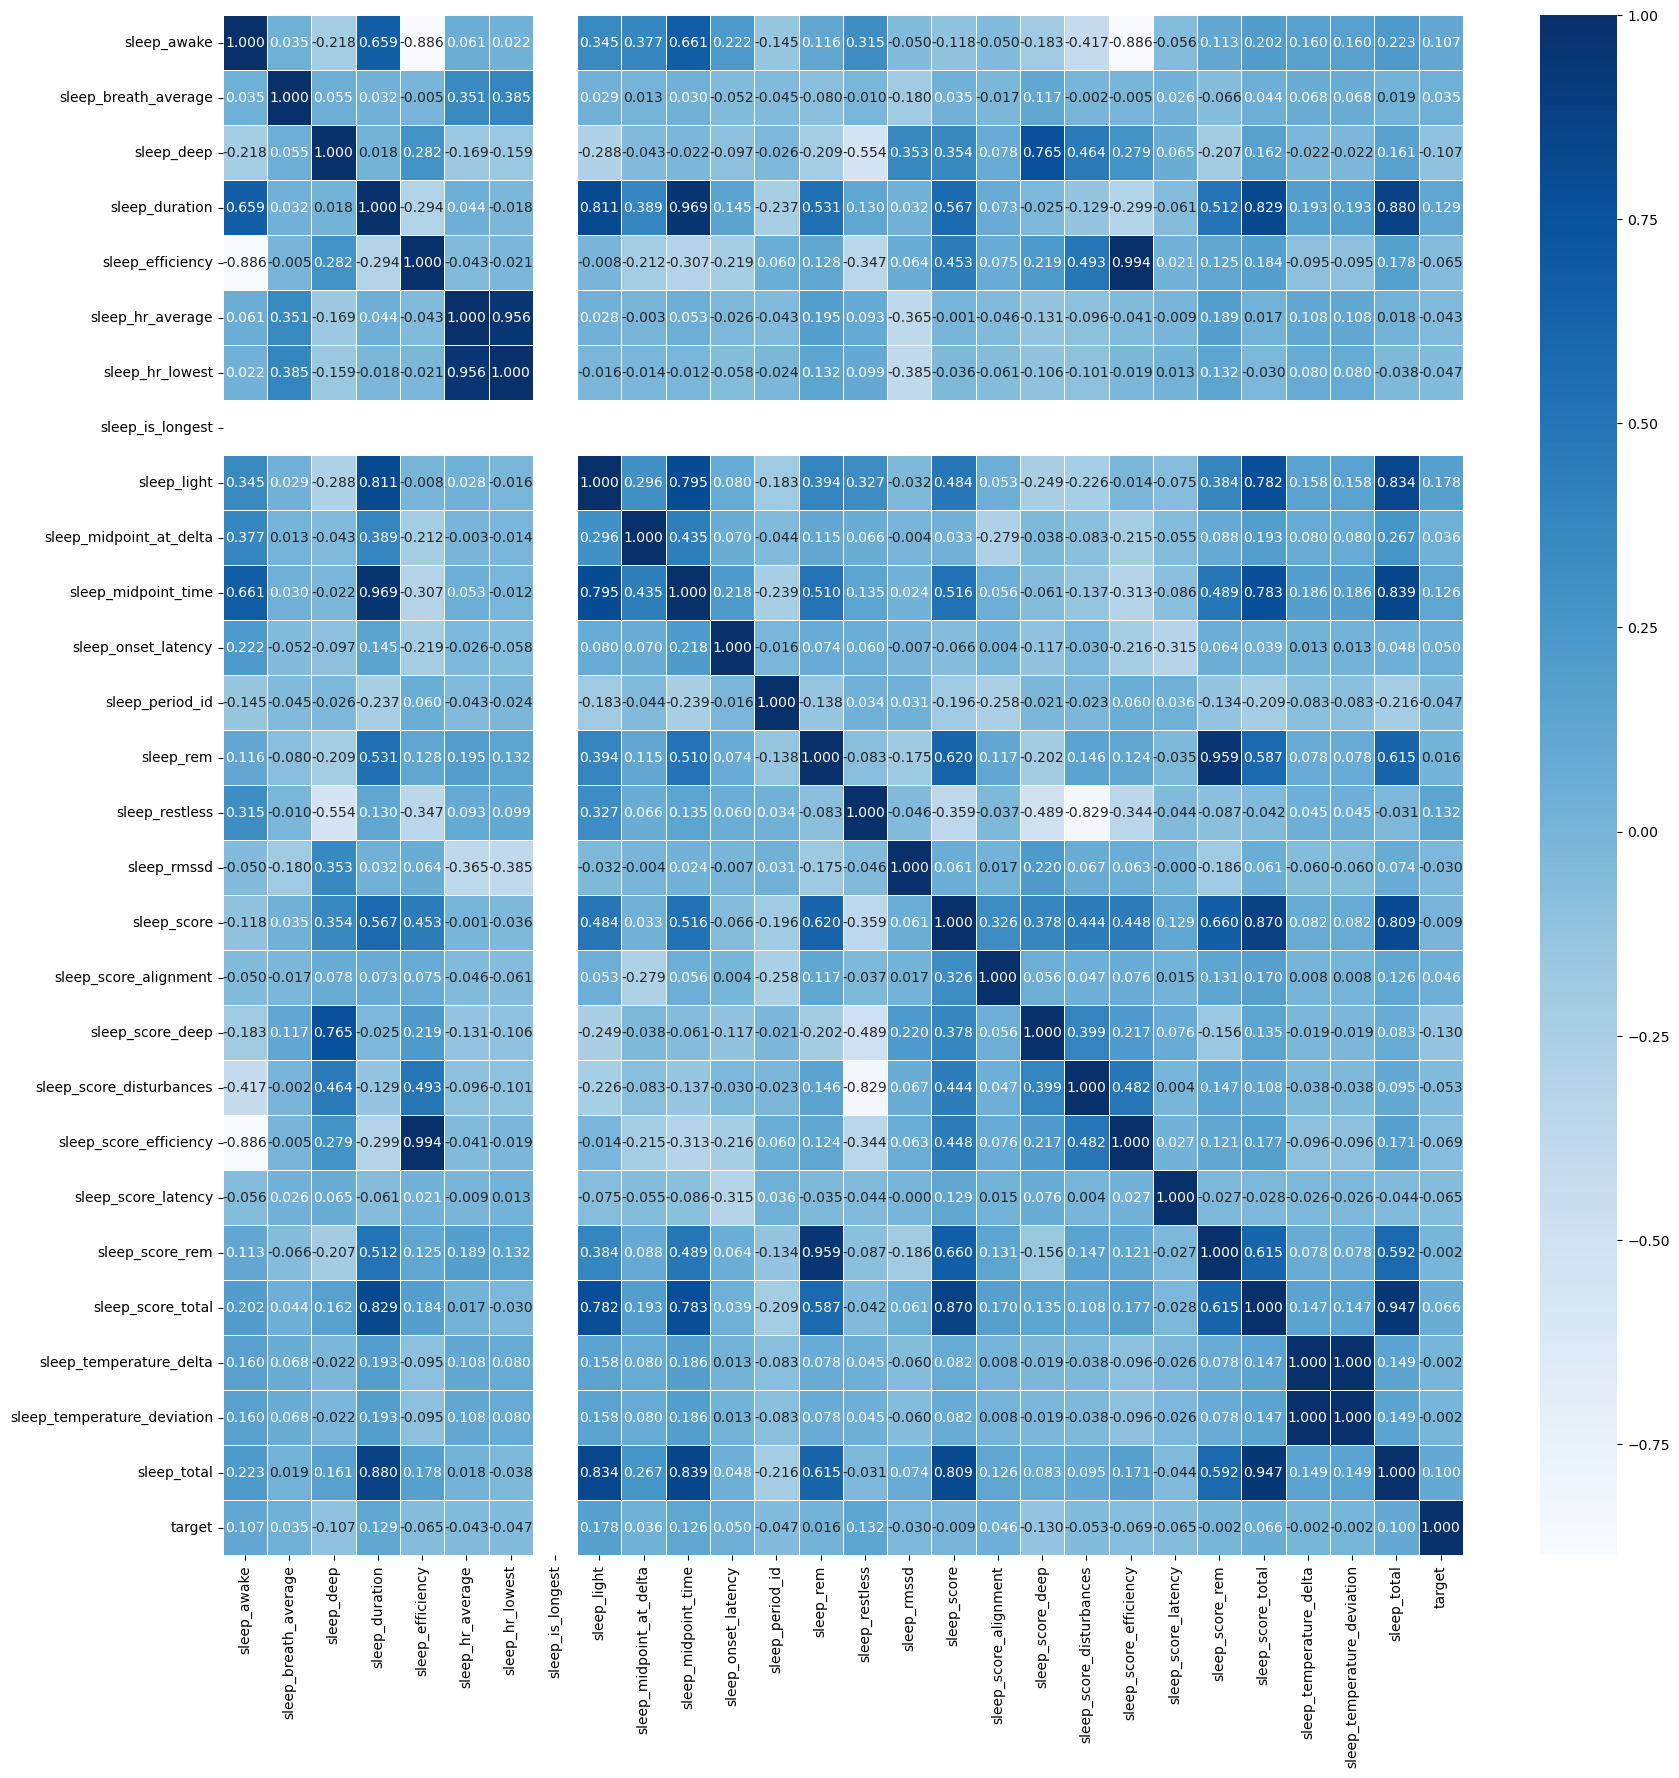

In [16]:
# 상관관계를 시각화

# heatmap을 그릴 영역을 5*5로 지정
plt.figure(figsize=(20, 20))

# heatmap에 대한 세부 사항 지정
# data= 데이터프레임(문자열을 제외한 데이터만 사용)
# annot= True: 박스 안 값 표시
# fmt='.2f': 박스 안에 표시될 값의 표시 형식, 소숫점 두자리수까지만 표시
# linewidths= 0.5: 박스와 박스 사이의 간격 설정
# cmap= 'Blues': 색상 선택
sns.heatmap(data=train_all.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')

In [17]:
tmp

,EMAIL,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,target
0,nia+005@rowan.kr,1860,15.875,5640,24480,92,59.63,54,1,11670,...,92,79,97,94,72,61,-0.13,-0.13,22620,1
1,nia+005@rowan.kr,1860,16.000,9660,31200,94,60.74,53,1,11250,...,100,80,99,99,99,88,0.11,0.11,29340,1
2,nia+005@rowan.kr,3210,15.625,7230,30420,89,61.25,53,1,14100,...,97,79,95,97,79,79,-0.10,-0.10,27210,1
3,nia+005@rowan.kr,1890,16.250,6690,28980,93,60.26,53,1,15750,...,96,81,99,91,63,79,0.13,0.13,27090,1
4,nia+005@rowan.kr,1200,15.875,4980,30180,96,60.71,55,1,18600,...,81,84,100,72,73,86,-0.41,-0.41,28980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+341@rowan.kr,9480,15.625,3720,46200,79,66.78,60,1,20580,...,75,56,72,94,100,100,0.41,0.41,36720,3
9701,nia+341@rowan.kr,8280,15.000,3480,38280,78,70.26,62,1,18030,...,70,62,67,99,99,96,0.07,0.07,30000,3
9702,nia+341@rowan.kr,2580,17.625,4890,26940,90,69.55,63,1,13470,...,95,60,96,72,90,74,-0.14,-0.14,24360,3
9703,nia+341@rowan.kr,8940,16.625,4470,40860,78,70.85,63,1,18420,...,91,63,67,97,100,99,0.25,0.25,31920,3


In [18]:
# Step 1: 'number' 열을 생성 (EMAIL에서 숫자만 추출)
tmp['number'] = tmp['EMAIL'].str.extract(r'(?<=nia\+)(\d+)', expand=False).astype(int)

# Step 2: EMAIL 열 삭제
tmp.drop(columns=['EMAIL'], inplace=True)

# 결과 출력
tmp

,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,...,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,target,number
0,1860,15.875,5640,24480,92,59.63,54,1,11670,10776,...,79,97,94,72,61,-0.13,-0.13,22620,1,5
1,1860,16.000,9660,31200,94,60.74,53,1,11250,8204,...,80,99,99,99,88,0.11,0.11,29340,1,5
2,3210,15.625,7230,30420,89,61.25,53,1,14100,8574,...,79,95,97,79,79,-0.10,-0.10,27210,1,5
3,1890,16.250,6690,28980,93,60.26,53,1,15750,9217,...,81,99,91,63,79,0.13,0.13,27090,1,5
4,1200,15.875,4980,30180,96,60.71,55,1,18600,8349,...,84,100,72,73,86,-0.41,-0.41,28980,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,9480,15.625,3720,46200,79,66.78,60,1,20580,6719,...,56,72,94,100,100,0.41,0.41,36720,3,341
9701,8280,15.000,3480,38280,78,70.26,62,1,18030,3181,...,62,67,99,99,96,0.07,0.07,30000,3,341
9702,2580,17.625,4890,26940,90,69.55,63,1,13470,10501,...,60,96,72,90,74,-0.14,-0.14,24360,3,341
9703,8940,16.625,4470,40860,78,70.85,63,1,18420,5415,...,63,67,97,100,99,0.25,0.25,31920,3,341


In [19]:
def boxplot(df):
    independent_vars = list(df.columns)

    anova_results = {}

    for var in independent_vars:
        group0 = df[df['target'] == 1][var]
        group1 = df[df['target'] == 2][var]
        group2 = df[df['target'] == 3][var]
    
        f_val, p_val = stats.f_oneway(group0, group1, group2)
        anova_results[var] = p_val

    sorted_vars = sorted(anova_results, key=anova_results.get)

    significant_vars = [var for var in sorted_vars if anova_results[var] < 0.05]

    print("유의미한 변수들:", significant_vars)
    print(len(significant_vars))

    # 모든 박스플롯을 한 화면에 표시
    n = len(significant_vars)
    cols = 4  # 한 행에 배치할 열 수
    rows = (n // cols) + (n % cols > 0)  # 필요한 행 수 계산

    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

    for idx, var in enumerate(significant_vars):
        sns.boxplot(x='target', y=var, data=df, palette='bright6',hue='target',legend=False, ax=axes[idx])
        axes[idx].set_title(f'{var} by Disease Severity')

    # 남는 서브플롯은 숨기기
    for i in range(len(significant_vars), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()  # 레이아웃 자동 조정
    plt.show()
    return significant_vars

c:\anaconda3\envs\datamining\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


유의미한 변수들: ['target', 'number', 'sleep_light', 'sleep_restless', 'sleep_midpoint_time', 'sleep_duration', 'sleep_total', 'sleep_score_deep', 'sleep_score_alignment', 'sleep_awake', 'sleep_deep', 'sleep_score_total', 'sleep_onset_latency', 'sleep_midpoint_at_delta', 'sleep_score_latency', 'sleep_breath_average', 'sleep_hr_lowest', 'sleep_score_efficiency', 'sleep_efficiency', 'sleep_rem', 'sleep_score_disturbances', 'sleep_hr_average', 'sleep_period_id', 'sleep_score_rem', 'sleep_rmssd', 'sleep_temperature_delta', 'sleep_temperature_deviation']
27


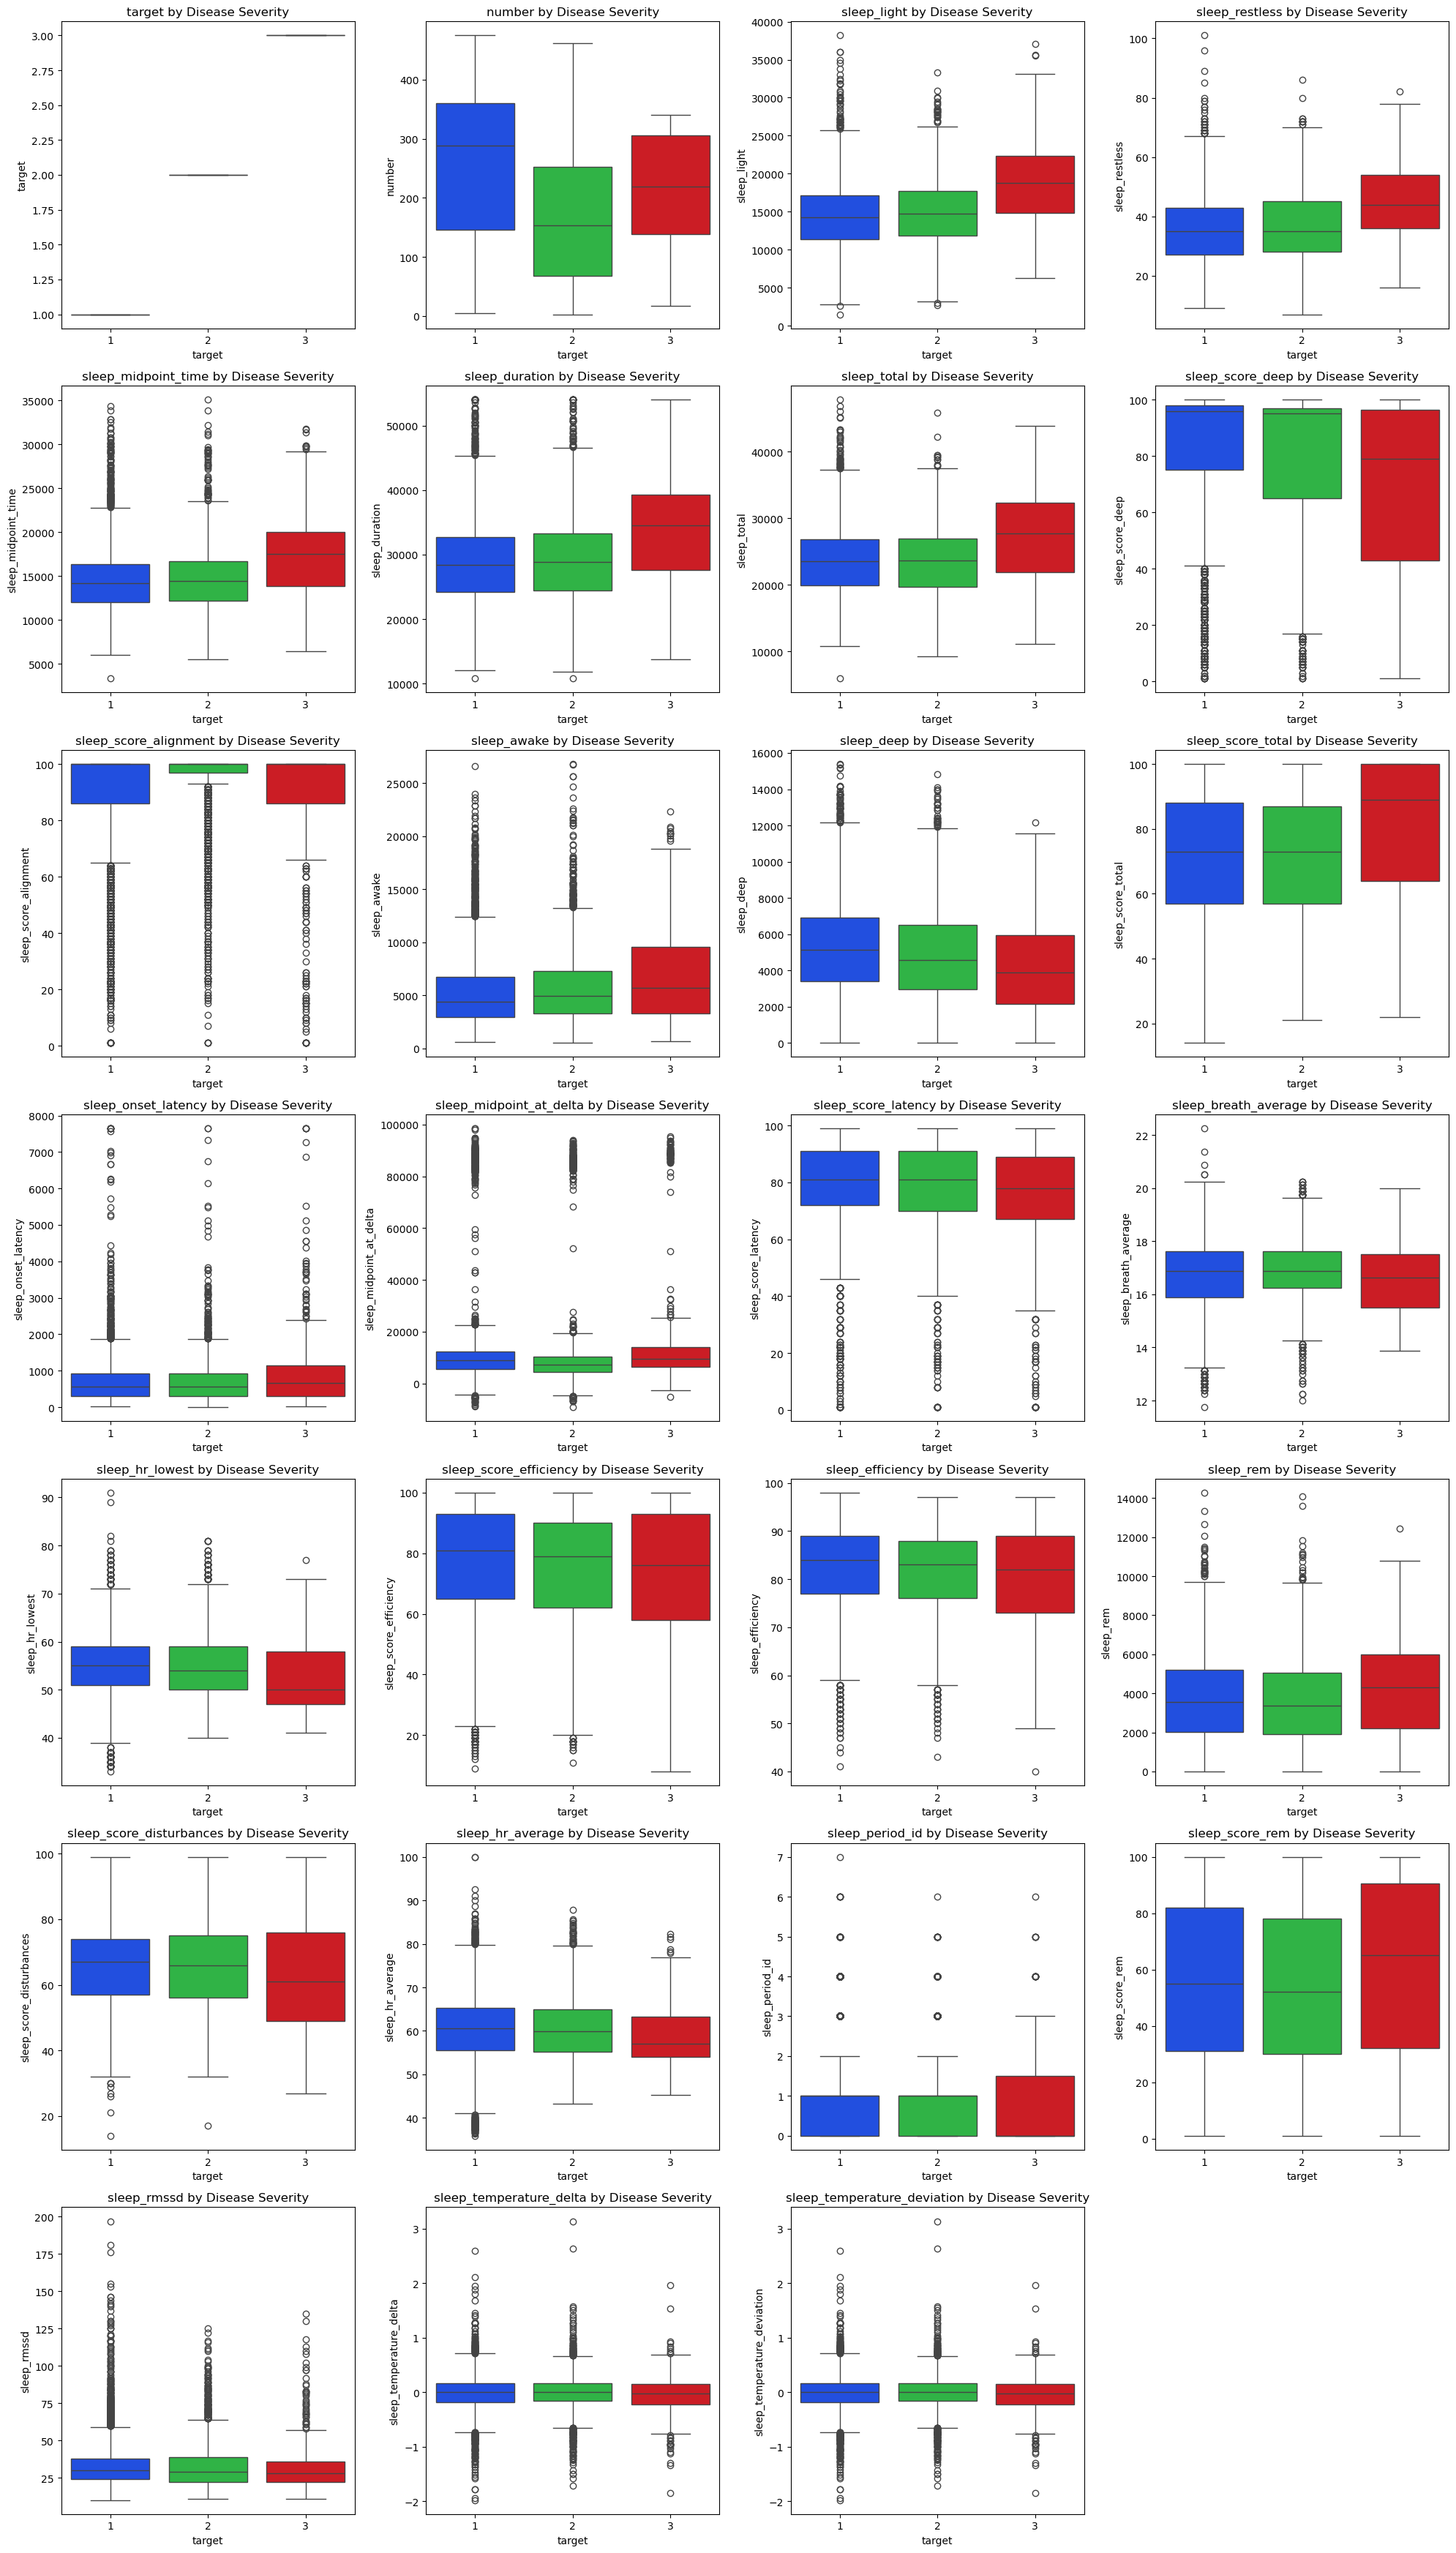

['target',
 'number',
 'sleep_light',
 'sleep_restless',
 'sleep_midpoint_time',
 'sleep_duration',
 'sleep_total',
 'sleep_score_deep',
 'sleep_score_alignment',
 'sleep_awake',
 'sleep_deep',
 'sleep_score_total',
 'sleep_onset_latency',
 'sleep_midpoint_at_delta',
 'sleep_score_latency',
 'sleep_breath_average',
 'sleep_hr_lowest',
 'sleep_score_efficiency',
 'sleep_efficiency',
 'sleep_rem',
 'sleep_score_disturbances',
 'sleep_hr_average',
 'sleep_period_id',
 'sleep_score_rem',
 'sleep_rmssd',
 'sleep_temperature_delta',
 'sleep_temperature_deviation']

In [20]:
data_for_box = tmp
boxplot(data_for_box)

In [28]:
tmp_mean = train_mean

# target 변수 numerical data로 변환
target_dict = {"CN": 1, "MCI": 2, "Dem": 3}
tmp_mean['target'] = tmp_mean['target'].map(target_dict)
tmp_mean = tmp_mean.sort_values(by=['target','EMAIL'], ascending=[True,True])
tmp_mean = tmp_mean.reset_index(drop=True)

tmp_mean['number'] = tmp_mean['EMAIL'].str.extract(r'(?<=nia\+)(\d+)', expand=False).astype(int)
tmp_mean.drop(columns=['EMAIL'], inplace=True)

In [29]:
tmp_mean

,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,...,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,target,number
0,2055.663717,16.307522,6152.123894,30115.752212,93.070796,65.231947,57.831858,1.0,16303.539823,11296.017699,...,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,0.057434,28060.088496,1,5
1,5147.142857,15.725000,8046.857143,28422.857143,81.628571,53.854000,47.885714,1.0,14088.000000,8222.742857,...,66.942857,76.457143,74.800000,20.628571,77.600000,0.237714,0.237714,23275.714286,1,15
2,5435.270270,18.831081,8199.729730,27224.594595,80.648649,68.982838,61.216216,1.0,12606.891892,9204.229730,...,68.337838,73.445946,79.905405,21.743243,78.229730,0.044054,0.044054,21789.324324,1,21
3,8670.379747,16.893987,5886.455696,34593.417722,75.379747,64.707342,58.000000,1.0,14666.202532,32002.139241,...,67.341772,61.240506,84.000000,76.746835,79.151899,0.051519,0.051519,25923.037975,1,31
4,5441.917808,16.964041,4462.191781,30269.589041,82.287671,47.194795,44.835616,1.0,18325.890411,7545.726027,...,59.630137,77.178082,83.945205,43.890411,91.726027,0.032192,0.032192,24827.671233,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,7465.227273,19.130682,3139.772727,26896.363636,73.227273,63.036364,57.772727,1.0,14092.500000,7871.818182,...,50.136364,57.727273,81.931818,32.636364,53.704545,0.011591,0.011591,19431.136364,3,219
137,4008.620690,15.393678,7461.034483,36944.827586,89.172414,54.870575,46.942529,1.0,19578.620690,7022.839080,...,85.735632,91.091954,68.609195,82.977011,98.252874,0.010460,0.010460,32936.206897,3,230
138,3726.891892,15.871622,2461.621622,31551.081081,88.581081,54.605135,48.202703,1.0,20261.756757,11127.121622,...,68.040541,89.189189,72.878378,71.135135,84.081081,-0.156622,-0.156622,27824.189189,3,306
139,3210.000000,17.280738,6413.114754,24405.245902,87.852459,57.650328,53.934426,1.0,14174.262295,9111.327869,...,74.786885,86.819672,81.983607,9.213115,61.016393,0.005574,0.005574,21195.245902,3,338


c:\anaconda3\envs\datamining\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


유의미한 변수들: ['target', 'number', 'sleep_light', 'sleep_score_latency', 'sleep_midpoint_time', 'sleep_duration', 'sleep_onset_latency', 'sleep_restless', 'sleep_score_alignment', 'sleep_total', 'sleep_score_deep', 'sleep_awake']
12


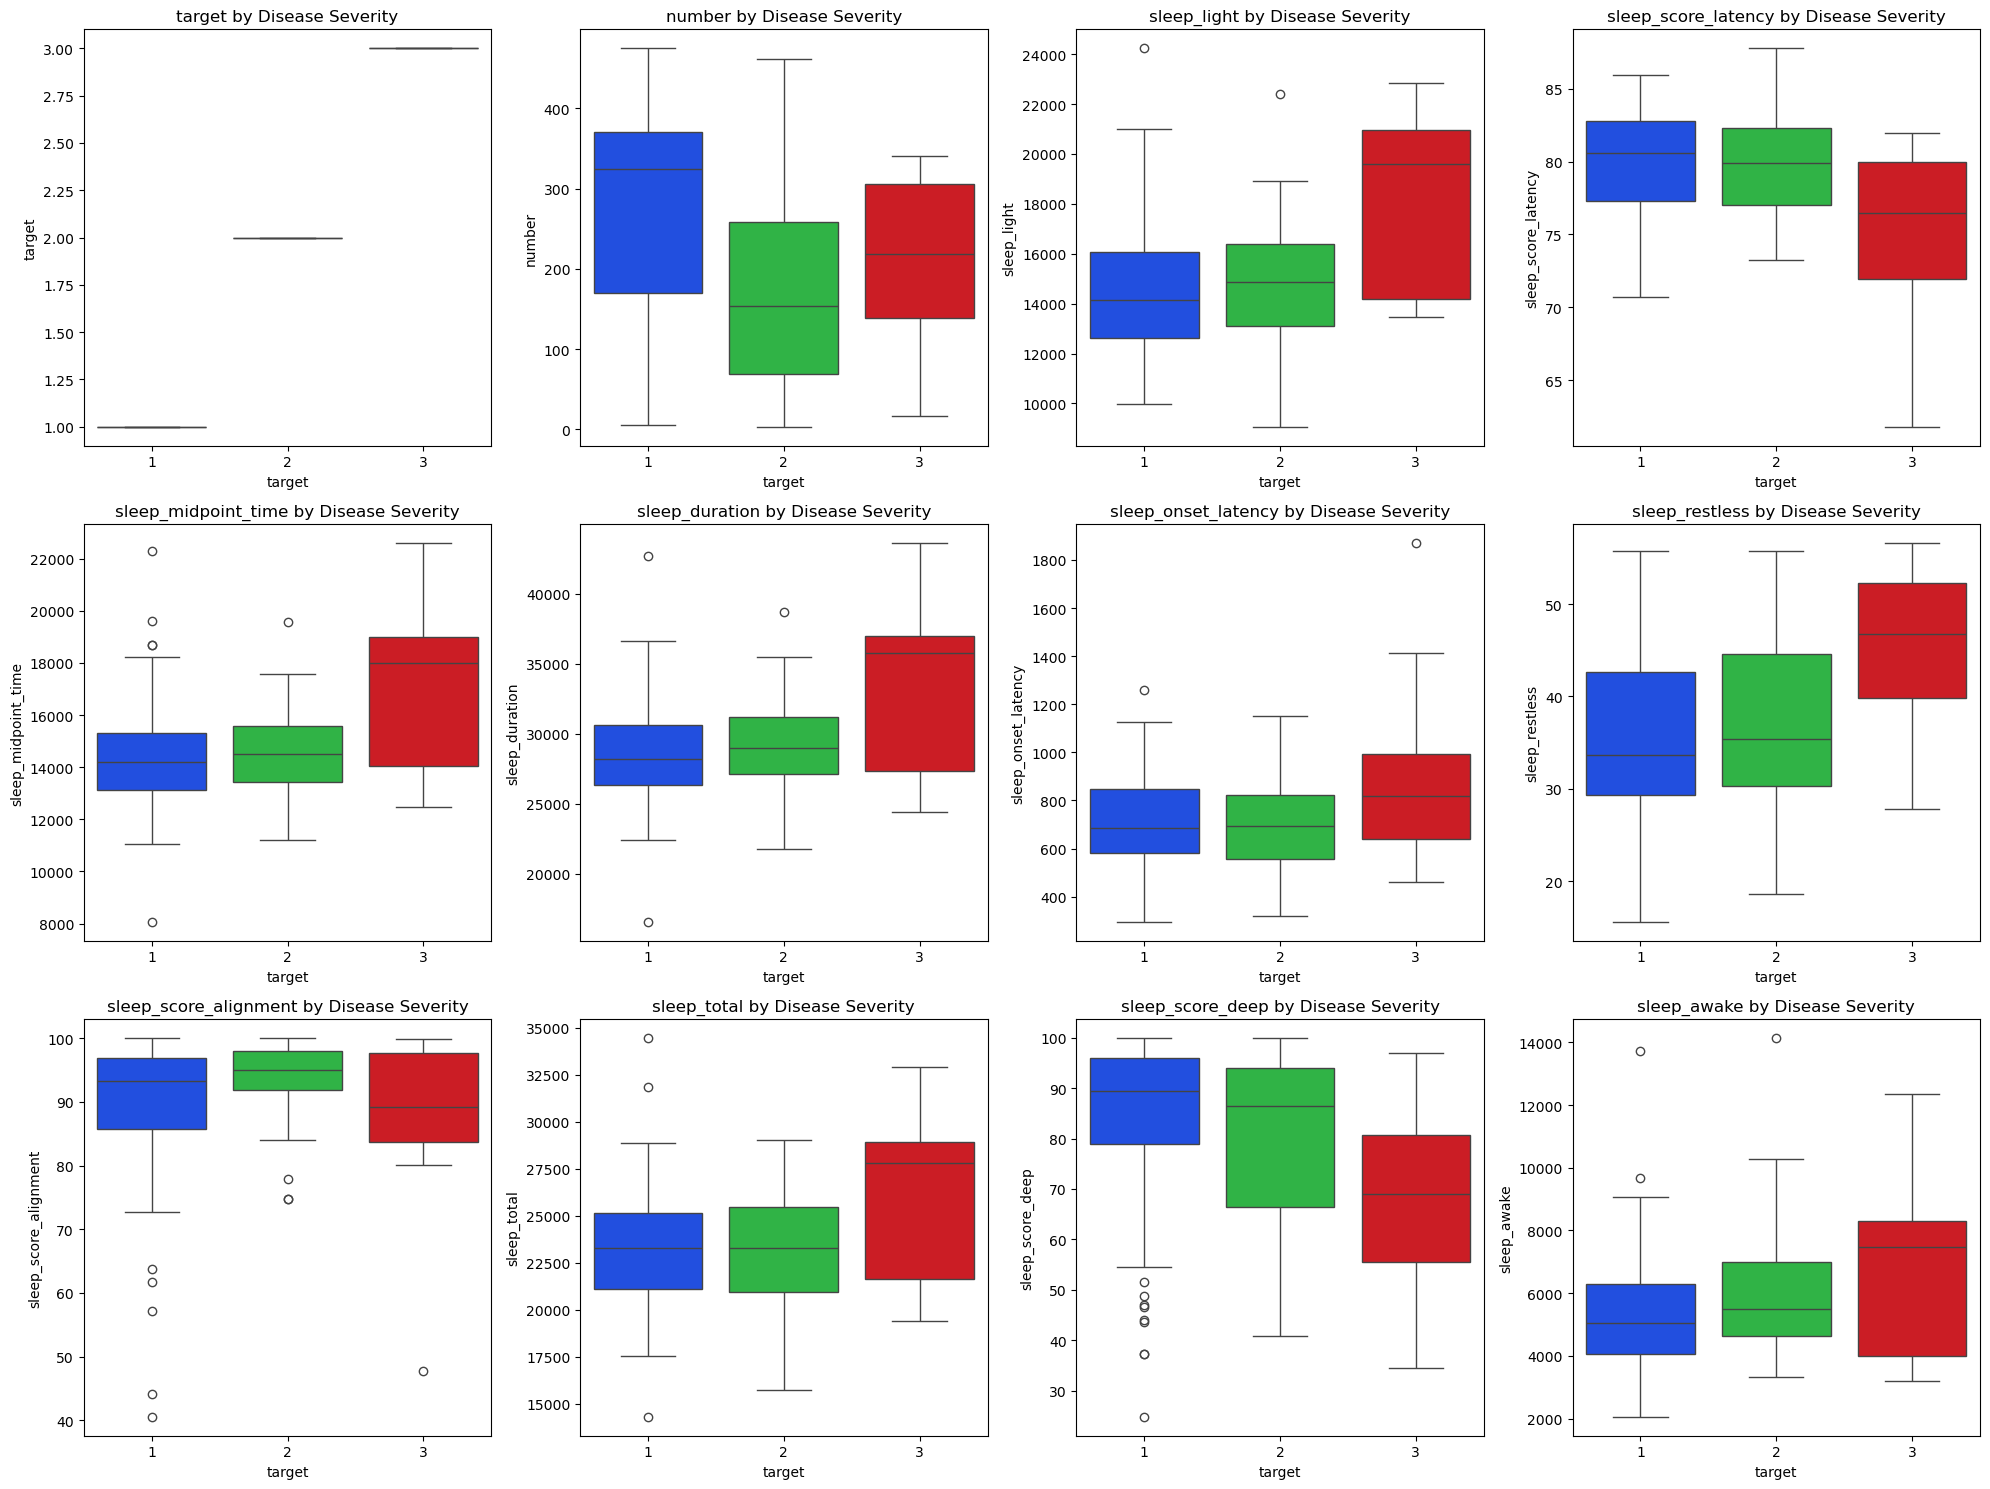

In [30]:
feature = boxplot(tmp_mean)